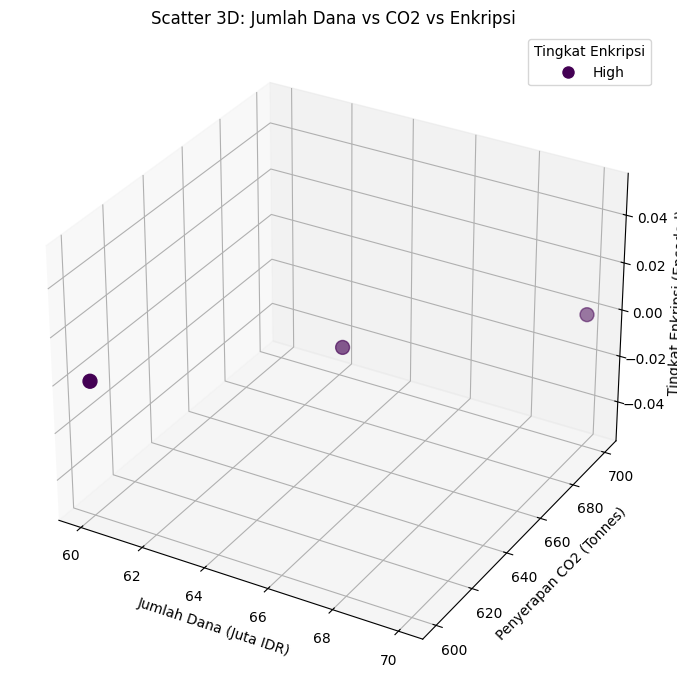

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Baca data
df = pd.read_csv("D:/ECO TECHNO LEADER/MANGROVECHAIN/efisiensi_pendanaan.csv")

# Pastikan kolom angka diubah jadi tipe float/int
df['amount_idr'] = df['amount_idr'].astype(float)
df['co2_sequestration_tonnes'] = df['co2_sequestration_tonnes'].astype(float)

# Encode 'encryption_level' menjadi angka agar bisa diplot di 3D
le = LabelEncoder()
df['encryption_level_encoded'] = le.fit_transform(df['encryption_level'])

# Buat Scatter Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['amount_idr'] / 1_000_000  # Dibagi 1 juta agar skala lebih kecil
y = df['co2_sequestration_tonnes']
z = df['encryption_level_encoded']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=100)

# Label sumbu
ax.set_xlabel("Jumlah Dana (Juta IDR)")
ax.set_ylabel("Penyerapan CO2 (Tonnes)")
ax.set_zlabel("Tingkat Enkripsi (Encoded)")

# Judul
ax.set_title("Scatter 3D: Jumlah Dana vs CO2 vs Enkripsi")

# Buat legenda dari LabelEncoder
legend_labels = le.inverse_transform([0, 1]) if len(le.classes_) == 2 else le.classes_
legend_colors = [scatter.cmap(scatter.norm(i)) for i in range(len(legend_labels))]
custom_lines = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                markerfacecolor=color, markersize=10)
                for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=custom_lines, title="Tingkat Enkripsi")

plt.tight_layout()
plt.show()
